In [1]:
import os
import dask.dataframe as dd

PATH = "/blue/carpena/haasehelen/ifwaste/output/multiple_stores/"
CURR_EXP = "run_0/"
file_names = ['log_bought', 'log_eaten', 'log_wasted', 'log_hh_config', "log_still_have",
                "log_hh_daily", "log_sim_config", "log_store_daily", "aggregated_outputs"]
data_dict = {}
current_path = os.path.join(PATH + CURR_EXP)
for file in file_names:
    file_path = os.path.join(current_path + file + ".csv")
    if os.path.exists(file_path):
        df = dd.read_csv(file_path)
        df["run"] = 0
        if "day" in df.columns:
            df["day"] = df["day"].astype(int)
        data_dict[file] = df

In [2]:
#get daily 

In [3]:
data_dict.keys()

dict_keys(['log_bought', 'log_eaten', 'log_wasted', 'log_hh_config', 'log_still_have', 'log_hh_daily', 'log_sim_config', 'log_store_daily', 'aggregated_outputs'])

In [4]:
num_days = 114

In [5]:
data_dict["log_hh_daily"].columns

Index(['household', 'day', 'budget', 'servings', 'EEF', 'shopped',
       'quick_shopped', 'attempted_shop', 'attempted_cook', 'cooked',
       'ate_leftovers', 'quick_cook', 'shopping_time', 'cooking_time', 'run'],
      dtype='object')

Sample Dask DataFrame Head (will show metadata, not data until computed):
   household  day   budget  servings  EEF  shopped  quick_shopped  \
0        708    0  149.505     8.657    0        0              1   
1         51    0  664.656     0.000    0        1              0   
2        204    0 -547.222     0.001    0        1              0   
3         85    0  492.512     0.000    0        1              0   
4        473    0  613.287     0.000    0        1              0   

   attempted_shop  attempted_cook  cooked  ate_leftovers  quick_cook  \
0               1               0       1              1           0   
1               0               0       1              1           0   
2               0               0       1              1           0   
3               0               0       1              1           0   
4               0               0       0              1           1   

   shopping_time  cooking_time  run  
0         15.000          17.0    0  
1 

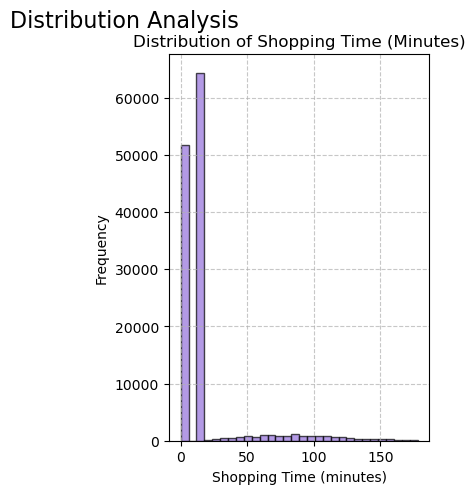

Histograms Generated.



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd # Import Dask DataFrame


num_households = 1152

# Convert to Dask DataFrame
df = data_dict["log_hh_daily"]

print("Sample Dask DataFrame Head (will show metadata, not data until computed):")
print(df.head()) # .head() on Dask DataFrame computes only a small part for preview
print("\n")

# --- 2. Data Preparation for Plotting (using Dask operations) ---
# Group by day to get daily aggregates for trends over time

# Count of households that 'quick_cook' on each day
# Dask's groupby and sum are lazy. We use .compute() to trigger the calculation.
daily_quick_cook_count = df.groupby('day')['quick_cook'].sum().reset_index().compute()
daily_quick_cook_count.rename(columns={'quick_cook': 'households_quick_cooking'}, inplace=True)

# Count of households that 'attempted to shop' (i.e., shopping_time > 0) on each day
# We'll create a new column indicating a shopping attempt (lazy operation)
df['shopping_attempt'] = (df['shopping_time'] > 0).astype(int)
daily_shopping_attempt_count = df.groupby('day')['shopping_attempt'].sum().reset_index().compute()
daily_shopping_attempt_count.rename(columns={'shopping_attempt': 'households_attempting_shop'}, inplace=True)


# --- 3. Plotting Options ---

# Histogram for Shopping Time
# We need to compute the 'shopping_time' series before plotting.
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.hist(df['shopping_time'].compute(), bins=30, color='mediumpurple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Shopping Time (Minutes)')
plt.xlabel('Shopping Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.suptitle('Distribution Analysis', fontsize=16, y=1.02)
plt.show()
print("Histograms Generated.\n")



In [7]:
data_dict["aggregated_outputs"].columns

Index(['household', 'FGMEAT', 'FGDAIRY', 'FGVEGETABLE', 'FGDRYFOOD',
       'FGSNACKS', 'FGBAKED', 'FGSTOREPREPARED', 'Inedible Parts',
       'Plate Waste', 'Spoiled Food', 'Prepared', 'Unprepared', 'Preprepared',
       'n_quickcook', 'n_cook', 'n_attempted_cook', 'n_leftovers', 'n_shop',
       'n_quickshop', 'n_attempted_shop', 'run'],
      dtype='object')

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd
from pyparsing import col # Import Dask DataFrame


Sample Dask DataFrame Head (will show metadata, not data until computed):
Generating Histograms for Shopping Factors...


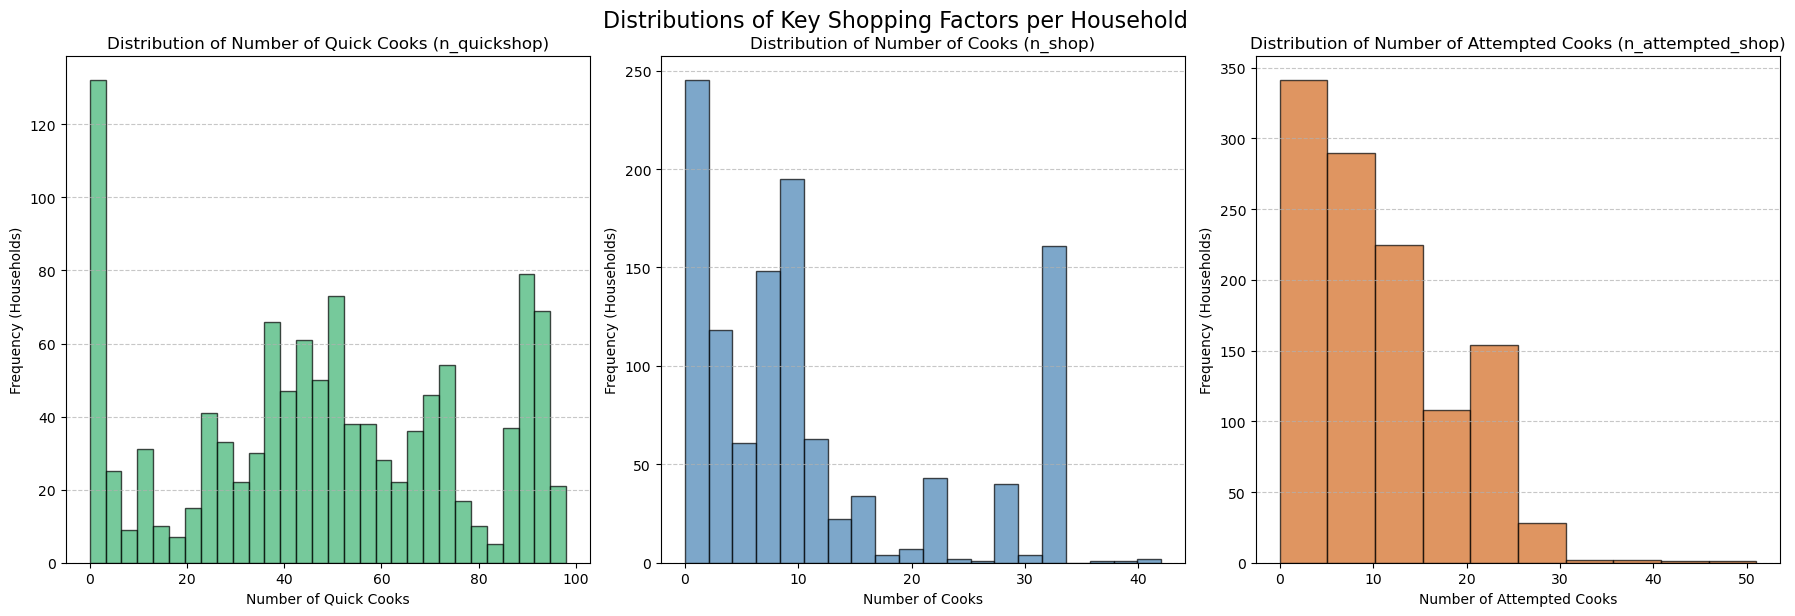

In [9]:

# Create a Pandas DataFrame first for simulation, then convert to Dask
df = pd.DataFrame(data_dict["aggregated_outputs"], columns=data_dict["aggregated_outputs"].columns)

print("Sample Dask DataFrame Head (will show metadata, not data until computed):")

# --- 2. Plotting Distributions of Shopping Factors (Histograms) ---
print("Generating Histograms for Shopping Factors...")

plt.figure(figsize=(18, 6)) # Larger figure for three subplots

# Histogram for 'n_quickshop'
plt.subplot(1, 3, 1) # 1 row, 3 columns, first plot
# Compute the series to Pandas before plotting
plt.hist(df['n_quickshop']
         , bins=30, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Quick Cooks (n_quickshop)')
plt.xlabel('Number of Quick Cooks')
plt.ylabel('Frequency (Households)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Histogram for 'n_shop'
plt.subplot(1, 3, 2) # 1 row, 3 columns, second plot
# Compute the series to Pandas before plotting
plt.hist(df['n_shop'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Cooks (n_shop)')
plt.xlabel('Number of Cooks')
plt.ylabel('Frequency (Households)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Histogram for 'n_attempted_shop'
plt.subplot(1, 3, 3) # 1 row, 3 columns, third plot
# Compute the series to Pandas before plotting
plt.hist(df['n_attempted_shop'], bins=10, color='chocolate', edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Attempted Cooks (n_attempted_shop)')
plt.xlabel('Number of Attempted Cooks')
plt.ylabel('Frequency (Households)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.suptitle('Distributions of Key Shopping Factors per Household', fontsize=16, y=1.02)
plt.show()


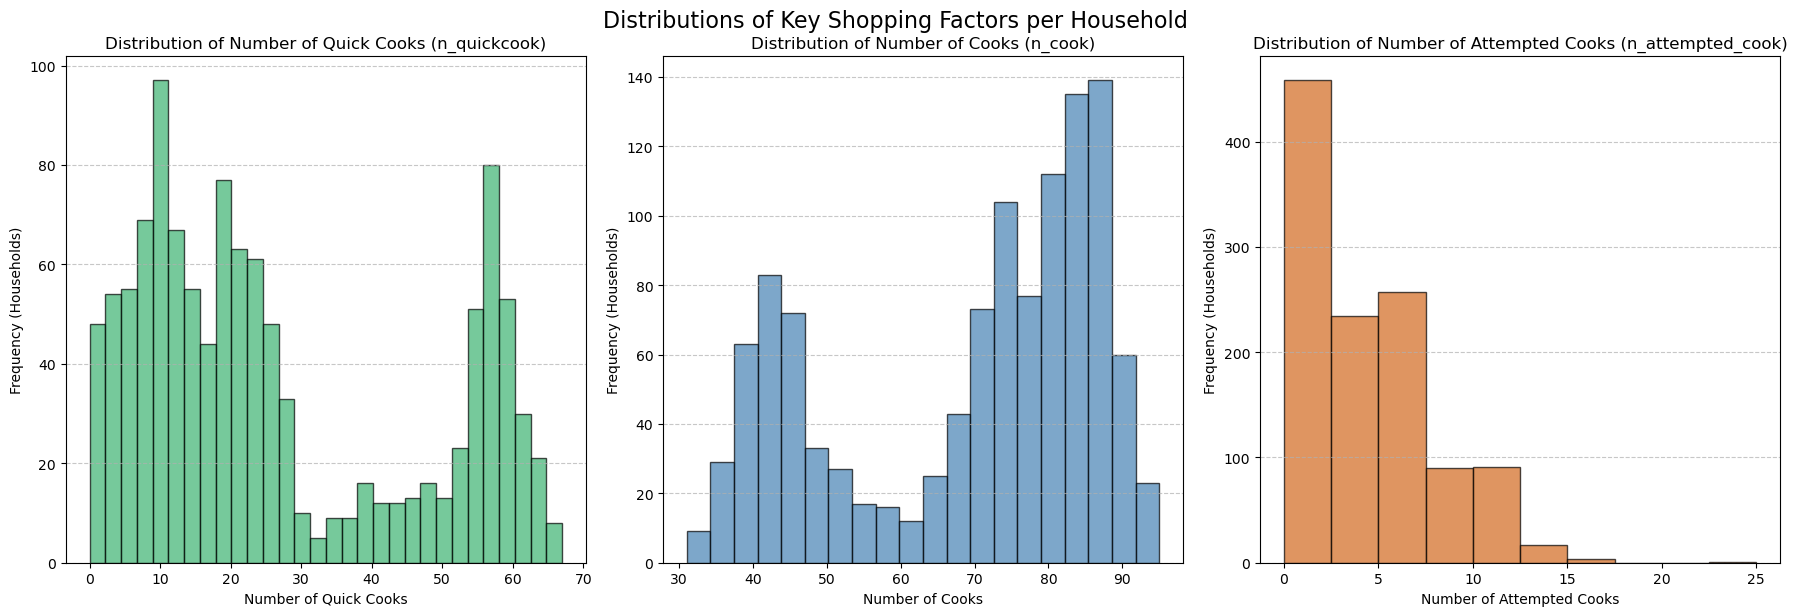

In [10]:
### COOKING

# Create a Pandas DataFrame first for simulation, then convert to Dask
df = pd.DataFrame(data_dict["aggregated_outputs"], columns=data_dict["aggregated_outputs"].columns)


plt.figure(figsize=(18, 6)) # Larger figure for three subplots

# Histogram for 'n_quickcook'
plt.subplot(1, 3, 1) # 1 row, 3 columns, first plot
# Compute the series to Pandas before plotting
plt.hist(df['n_quickcook']
         , bins=30, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Quick Cooks (n_quickcook)')
plt.xlabel('Number of Quick Cooks')
plt.ylabel('Frequency (Households)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Histogram for 'n_cook'
plt.subplot(1, 3, 2) # 1 row, 3 columns, second plot
# Compute the series to Pandas before plotting
plt.hist(df['n_cook'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Cooks (n_cook)')
plt.xlabel('Number of Cooks')
plt.ylabel('Frequency (Households)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Histogram for 'n_attempted_cook'
plt.subplot(1, 3, 3) # 1 row, 3 columns, third plot
# Compute the series to Pandas before plotting
plt.hist(df['n_attempted_cook'], bins=10, color='chocolate', edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Attempted Cooks (n_attempted_cook)')
plt.xlabel('Number of Attempted Cooks')
plt.ylabel('Frequency (Households)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.suptitle('Distributions of Key Shopping Factors per Household', fontsize=16, y=1.02)
plt.show()


In [11]:
!pwd

/blue/carpena/haasehelen/ifwaste/analysis


In [12]:

import dask.dataframe as dd

config_file_path = "/blue/carpena/haasehelen/ifwaste/input/gsua_based_configuration/samples/household_ifwaste_sample_df.txt"
df_config = dd.read_csv(config_file_path, sep="\t")


Loading and processing config data...
Merging dataframes and analyzing undershopping households...


/blue/carpena/haasehelen/.conda/envs/ifwaste-env-2/lib/python3.12/site-packages/dask/dataframe/multi.py:521: UserWarning: Merging dataframes with merge column data type mismatches: 
+----------------------------+------------+-------------+
| Merge columns              | left dtype | right dtype |
+----------------------------+------------+-------------+
| ('household', 'household') | float64    | int64       |
+----------------------------+------------+-------------+
Cast dtypes explicitly to avoid unexpected results.
  warnings.warn(
/scratch/local/6563333/ipykernel_2145923/1036894830.py:73: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  plt.title(f'Shopping Behavior for Household ID: {int(sample_household_id)}')


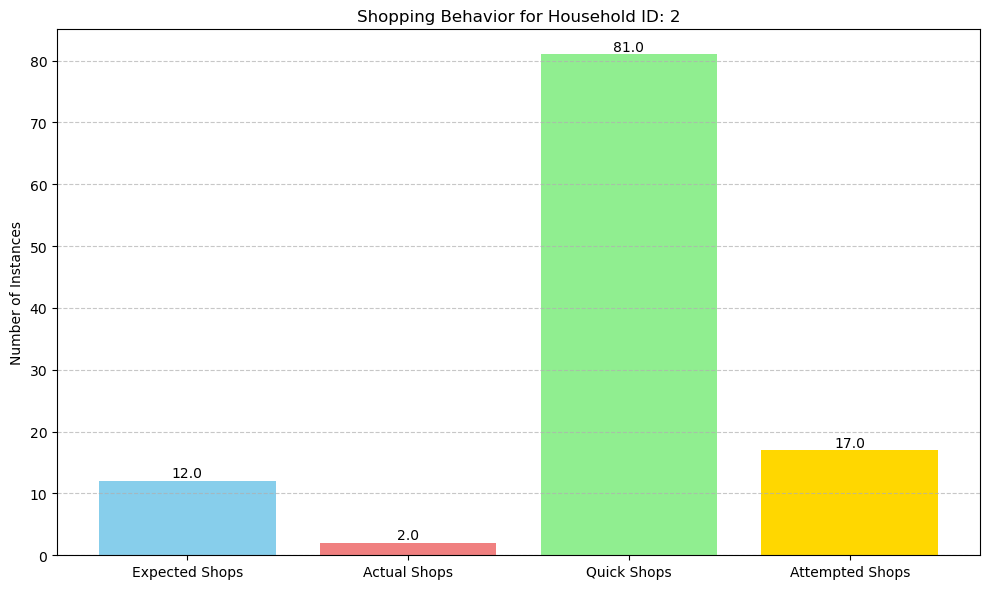

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd # Import Dask DataFrame
import ast # To safely evaluate string representations of lists


SAMPLE_ID = 2 # You can change this index to view a different undershopping household
df = data_dict["aggregated_outputs"]


# --- 2. Load and process the config Dask DataFrame (df_config) ---
print("Loading and processing config data...")
config_file_path = "/blue/carpena/haasehelen/ifwaste/input/gsua_based_configuration/samples/household_ifwaste_sample_df.txt"

df_config = dd.read_csv(config_file_path, sep="\t")
df_config = df_config.reset_index()

# Rename the newly created index column to 'household'
if 'index' in df_config.columns:
    df_config = df_config.rename(columns={'index': 'household'})
elif 'level_0' in df_config.columns: # Sometimes Dask uses 'level_0' for the reset index column
    df_config = df_config.rename(columns={'level_0': 'household'})
else:
    print("Warning: Could not find 'index' or 'level_0' column after reset_index. Assuming 'household' column already exists or was created differently.")

# Clean the other column names by removing 'Household:' prefix.
df_config.columns = [
    col.replace('Household:', '') if isinstance(col, str) and 'Household:' in col else col
    for col in df_config.columns
]

# Ensure 'household' column in df_config is numeric for merging/filtering
df_config['household'] = df_config['household'].astype(int)

# --- 3. Merge DataFrames and Identify Undershopping Households ---
print("Merging dataframes and analyzing undershopping households...")

# Merge the two Dask DataFrames on 'household'
merged_df = df.merge(df_config[['household', 'hh_shopping_frequency', "hh_max_avail_time_per_day"]], on='household', how='left')

# Define the total number of days for the analysis period
total_analysis_days = 114

# Calculate the 'expected_shop_count'
merged_df['expected_shop_count'] = (total_analysis_days / merged_df['hh_shopping_frequency']).astype(int)

# Identify households that shop less often than they should
undershopping_households_df = merged_df[merged_df['n_shop'] < merged_df['expected_shop_count']]

# Compute the count and the DataFrame of undershopping households
num_undershopping_households = undershopping_households_df.household.count().compute()
undershopping_households_df_computed = undershopping_households_df.compute()

if not undershopping_households_df_computed.empty:
    # Select the first undershopping household for plotting
    selected_household_data = undershopping_households_df_computed[undershopping_households_df_computed["household"] == SAMPLE_ID]
    sample_household_id = selected_household_data['household']

    expected_shops = selected_household_data['expected_shop_count']
    actual_shops = selected_household_data['n_shop']
    quick_shops = selected_household_data['n_quickshop']
    attempted_shops = selected_household_data['n_attempted_shop']

    # Data for plotting
    labels = ['Expected Shops', 'Actual Shops', 'Quick Shops', 'Attempted Shops']
    values = [expected_shops.values[0], actual_shops.values[0], quick_shops.values[0], attempted_shops.values[0]]
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, values, color=colors)
    plt.ylabel('Number of Instances')
    plt.title(f'Shopping Behavior for Household ID: {int(sample_household_id)}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


In [14]:
df

,household,FGMEAT,FGDAIRY,FGVEGETABLE,FGDRYFOOD,FGSNACKS,FGBAKED,FGSTOREPREPARED,Inedible Parts,Plate Waste,Spoiled Food,Prepared,Unprepared,Preprepared,n_quickcook,n_cook,n_attempted_cook,n_leftovers,n_shop,n_quickshop,n_attempted_shop,run
npartitions=1,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [15]:
len(undershopping_households_df)


#TODO make sure we use the same sample id

1152

In [16]:
num_households_log = 1152
num_days  = 114

Loading and processing config data...
2    [179, 98, 75, 165, 85, 45, 102]
Name: hh_max_avail_time_per_day, dtype: object
Household 2 shopping frequency: 9 days.
Index(['household', 'day', 'budget', 'servings', 'EEF', 'shopped',
       'quick_shopped', 'attempted_shop', 'attempted_cook', 'cooked',
       'ate_leftovers', 'quick_cook', 'shopping_time', 'cooking_time', 'run',
       'shopping_attempt'],
      dtype='object')


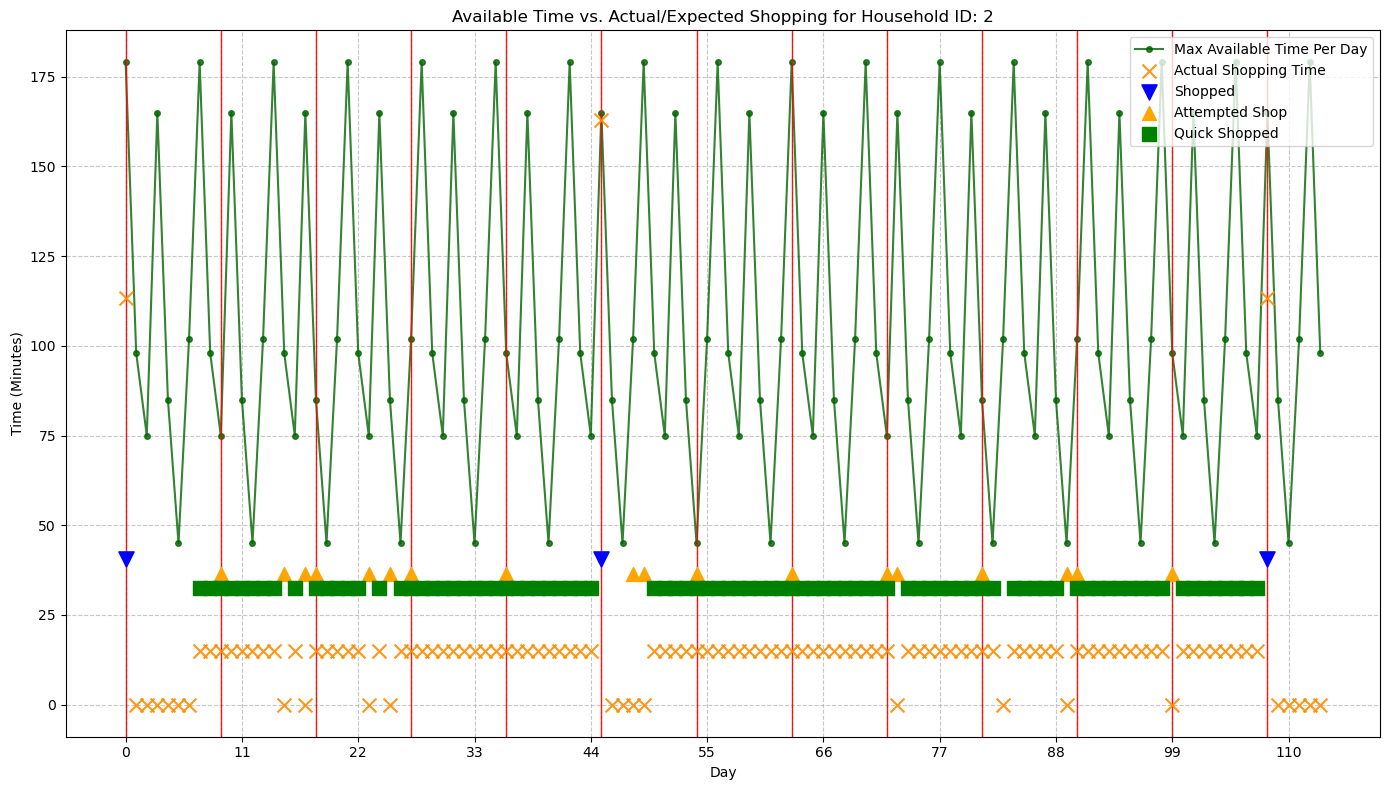

In [17]:



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd # Import Dask DataFrame
import ast # To safely evaluate string representations of lists

# --- 1. Load and process the config Dask DataFrame (df_config) ---
print("Loading and processing config data...")
config_file_path = "/blue/carpena/haasehelen/ifwaste/input/gsua_based_configuration/samples/household_ifwaste_sample_df.txt"

df_config = dd.read_csv(config_file_path, sep="\t")
df_config = df_config.reset_index()

# Rename the newly created index column to 'household'
if 'index' in df_config.columns:
    df_config = df_config.rename(columns={'index': 'household'})
elif 'level_0' in df_config.columns:
    df_config = df_config.rename(columns={'level_0': 'household'})
else:
    print("Warning: Could not find 'index' or 'level_0' column after reset_index. Assuming 'household' column already exists or was created differently.")

# Clean other column names by removing 'Household:' prefix
df_config.columns = [
    col.replace('Household:', '') if isinstance(col, str) and 'Household:' in col else col
    for col in df_config.columns
]

# Ensure 'household' column in df_config is numeric for merging/filtering
df_config['household'] = df_config['household'].astype(int)


# Generate sample household IDs that will likely overlap with config households
sample_household_ids = np.arange(num_households_log) # Using sequential IDs for simplicity

log_hh_daily = data_dict["log_hh_daily"]
log_hh_daily['household'] = log_hh_daily['household'].astype(int)

common_households = pd.Series(list(set(log_hh_daily['household'].unique().compute()) & \
                                   set(df_config['household'].unique().compute())))

if not common_households.empty:
    household_to_plot_id = common_households.iloc[SAMPLE_ID] # Pick the first common household ID
else:
    print("No common households found between log_hh_daily and df_config. Cannot plot.")
    household_to_plot_id = None # Set to None to skip plotting

if household_to_plot_id is not None:
    # Filter log_hh_daily for the selected household and compute to Pandas
    selected_household_log_data = log_hh_daily[log_hh_daily['household'] == household_to_plot_id].compute()

    # Retrieve hh_max_avail_time_per_day and hh_shopping_frequency for the selected household from df_config
    config_for_selected_hh = df_config[df_config['household'] == household_to_plot_id][
        ['hh_max_avail_time_per_day', 'hh_shopping_frequency']
    ].compute()

    if not config_for_selected_hh.empty:
        # Parse hh_max_avail_time_per_day
        print(config_for_selected_hh['hh_max_avail_time_per_day'])
        max_avail_time_list_str = config_for_selected_hh['hh_max_avail_time_per_day'].iloc[0]
        try:
            hh_max_avail_time_list = ast.literal_eval(max_avail_time_list_str)
            if not isinstance(hh_max_avail_time_list, list):
                raise ValueError("Evaluated value is not a list.")
        except (ValueError, SyntaxError) as e:
            print(f"Error parsing hh_max_avail_time_per_day for household {household_to_plot_id}: {e}")
            print("Defaulting to a dummy list for plotting.")
            hh_max_avail_time_list = [0] * 7 # Fallback dummy list for plotting

        # Get hh_shopping_frequency
        hh_shopping_frequency = config_for_selected_hh['hh_shopping_frequency'].iloc[0]
        print(f"Household {household_to_plot_id} shopping frequency: {hh_shopping_frequency} days.")
        print(selected_household_log_data.columns)
        # Calculate the hh_max_avail_time_per_day for each day based on the 7-day cycle
        selected_household_log_data = selected_household_log_data.sort_values(by='day')
        selected_household_log_data['expected_available_time'] = selected_household_log_data['day'].apply(
            lambda d: hh_max_avail_time_list[d % 7]
        )

        # Determine days when the household should shop
        # Assuming day 0 is a potential shopping day, then every hh_shopping_frequency days thereafter
        should_shop_days = [
            day for day in range(num_days)
            if day % hh_shopping_frequency == 0
        ]
       
    
        ## TODO add the values from the new run!!! 
        # Identify days based on event type
        days_shopped = selected_household_log_data[selected_household_log_data['shopped'] == 1]['day'].tolist()
        days_attempted_shop = selected_household_log_data[selected_household_log_data['attempted_shop'] == 1]['day'].tolist()
        days_quick_shopped = selected_household_log_data[selected_household_log_data['quick_shopped'] == 1]['day'].tolist()
        y_actual_shop_marker = selected_household_log_data['expected_available_time'].min() * 0.9 if not selected_household_log_data.empty else 0
        if y_actual_shop_marker == 0: # If all times are 0, use a small offset
            y_actual_shop_marker = -5
        # Plotting
        plt.figure(figsize=(14, 8)) # Slightly larger figure for clarity
        plt.plot(selected_household_log_data['day'], selected_household_log_data['expected_available_time'],
                 label='Max Available Time Per Day', color='darkgreen', linestyle='-', marker='o', markersize=4, alpha=0.8)
        plt.scatter(selected_household_log_data['day'], selected_household_log_data['shopping_time'],
                    label='Actual Shopping Time', color='darkorange', marker='x', s=100, alpha=0.9, zorder=5)

        plt.scatter(days_shopped, [y_actual_shop_marker] * len(days_shopped),
                    marker='v', s=120, color='blue', label='Shopped', zorder=6)

        plt.scatter(days_attempted_shop, [y_actual_shop_marker - 4] * len(days_attempted_shop),
                    marker='^', s=100, color='orange', label='Attempted Shop', zorder=6)

        plt.scatter(days_quick_shopped, [y_actual_shop_marker - 8] * len(days_quick_shopped),
                    marker='s', s=100, color='green', label='Quick Shopped', zorder=6)

        # Add vertical lines for days the household should shop
        for shop_day in should_shop_days:
            plt.axvline(x=shop_day, color='gray', linestyle='--', linewidth=0.8, alpha=0.7, label='_nolegend_') # _nolegend_ to avoid repeating label
            plt.axvline(x=shop_day, color='red', linewidth=1, alpha=0.9)

        # Add markers for days the household actually shopped at the bottom of the plot
        # Using a fixed y-value for clarity
        

       
        plt.title(f'Available Time vs. Actual/Expected Shopping for Household ID: {int(household_to_plot_id)}')
        plt.xlabel('Day')
        plt.ylabel('Time (Minutes)')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(np.arange(0, num_days, max(1, num_days // 10))) # Dynamic x-ticks
        plt.legend()
        plt.tight_layout()
        plt.show()

        


In [18]:
num_days

114

In [19]:
#- budget? 
#- miscalculation of what they need 
#- going shopping but its not necessary

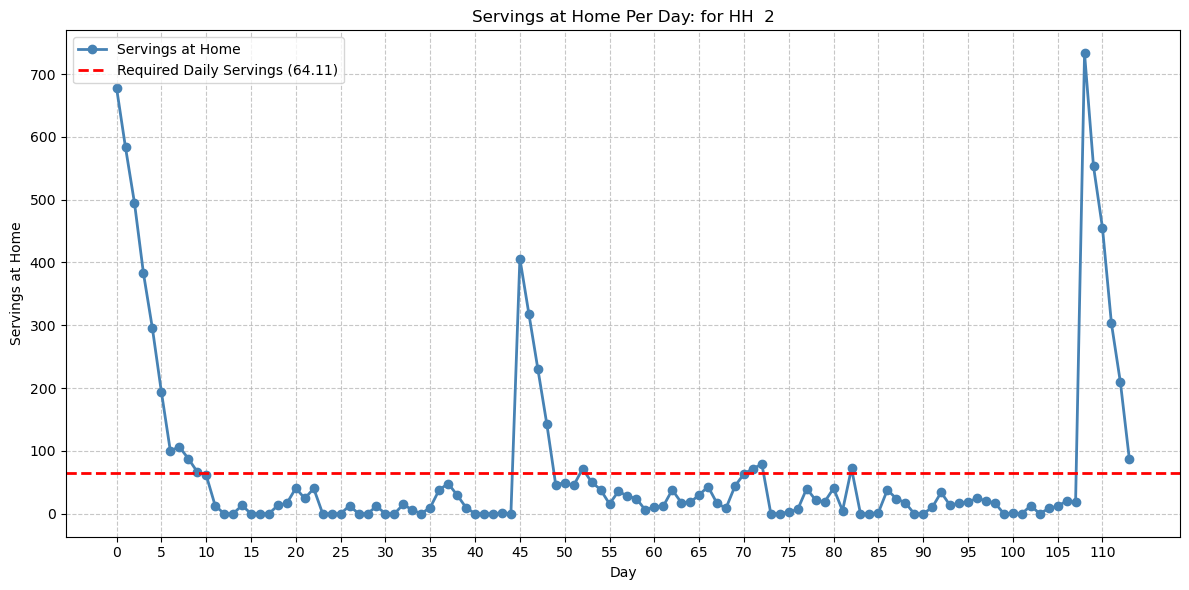

In [20]:
### Lets see what this household still has (bought - eaten) - is a quickshop really necessary?

### Lets see what this household still has (bought - eaten) - is a quickshop really necessary?
bought_household = data_dict["log_bought"][data_dict["log_bought"]["household"] == SAMPLE_ID].compute()
eaten_household = data_dict["log_eaten"][data_dict["log_eaten"]["household"] == SAMPLE_ID].compute()
wasted_household = data_dict["log_wasted"][data_dict["log_wasted"]["household"] == SAMPLE_ID].compute()

config = data_dict["log_hh_config"].compute()
required_serving = config[config["household"] == SAMPLE_ID]["required_servings"].iloc[0]


#wasted
daily_wasted = wasted_household.groupby('day')['servings'].sum().reset_index()
daily_wasted.rename(columns={'servings': 'servings_wasted'}, inplace=True)

# Calculate daily food bought
bought_household['total_servings'] = bought_household['amount'] * bought_household['servings']
daily_bought = bought_household.groupby('day')['total_servings'].sum().reset_index()
daily_bought.rename(columns={'total_servings': 'servings_bought'}, inplace=True)

# Calculate daily food eaten
# Sum all FG... columns for total servings eaten per row
fg_columns = [col for col in eaten_household.columns if col.startswith('FG')]
eaten_household['total_servings'] = eaten_household[fg_columns].sum(axis=1)
daily_eaten = eaten_household.groupby('day')['total_servings'].sum().reset_index()
daily_eaten.rename(columns={'total_servings': 'servings_eaten'}, inplace=True)

# Merge daily bought and eaten data
food_data = pd.merge(daily_bought, daily_eaten, on='day', how='outer').fillna(0)
food_data = pd.merge(food_data, daily_wasted, on='day', how='outer').fillna(0)

# Calculate servings at home per day
food_data['servings_at_home'] = 0.0
# Initialize 'servings_at_home' column with '0.0' for all the rows

# Ensure all days from 0 to max_day are present and fill missing values with 0
max_day = max(food_data['day'].max(), 0) # Handle case where there might be no data
all_days = pd.DataFrame({'day': range(int(max_day) + 1)})
food_data = pd.merge(all_days, food_data, on='day', how='left').fillna(0)

# Sort by day to ensure correct cumulative sum calculation
food_data = food_data.sort_values(by='day')

# Calculate initial servings at home for day 0
if 0 in food_data['day'].values:
    food_data.loc[food_data['day'] == 0, 'servings_at_home'] = food_data.loc[food_data['day'] == 0, 'servings_bought'] - food_data.loc[food_data['day'] == 0, 'servings_eaten'] \
     - food_data.loc[food_data['day'] == 0, 'servings_wasted']
else:
    food_data.loc[food_data['day'] == 0, 'servings_at_home'] = 0

# Calculate servings at home for subsequent days
for i in range(1, len(food_data)):
    prev_day_servings = food_data.loc[food_data['day'] == food_data['day'].iloc[i-1], 'servings_at_home'].iloc[0]
    current_day_bought = food_data.loc[food_data['day'] == food_data['day'].iloc[i], 'servings_bought'].iloc[0]
    current_day_eaten = food_data.loc[food_data['day'] == food_data['day'].iloc[i], 'servings_eaten'].iloc[0]
    current_day_wasted = food_data.loc[food_data['day'] == food_data['day'].iloc[i], 'servings_wasted'].iloc[0]
    food_data.loc[food_data['day'] == food_data['day'].iloc[i], 'servings_at_home'] = (
        prev_day_servings + current_day_bought - current_day_eaten - current_day_wasted
    )
# Plotting servings at home per day
plt.figure(figsize=(12, 6))
plt.plot(food_data['day'], food_data['servings_at_home'],
         color='steelblue', marker='o', linestyle='-',
         linewidth=2, markersize=6, label='Servings at Home')

plt.axhline(y=required_serving, color='red', linestyle='--', linewidth=2,
            label=f'Required Daily Servings ({required_serving})')

# Add labels and grid
plt.title('Servings at Home Per Day: for HH  '+ str(SAMPLE_ID))
plt.xlabel('Day')
plt.ylabel('Servings at Home')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, food_data['day'].max() + 1, max(1, food_data['day'].max() // 20)))
plt.legend()
plt.tight_layout()

# Save the figure
#plt.savefig('servings_at_home_per_day.png', dpi=300)
plt.show()

Loading and processing config data...


2    [179, 98, 75, 165, 85, 45, 102]
Name: hh_max_avail_time_per_day, dtype: object
Household 2 shopping frequency: 9 days.
Index(['household', 'day', 'budget', 'servings', 'EEF', 'shopped',
       'quick_shopped', 'attempted_shop', 'attempted_cook', 'cooked',
       'ate_leftovers', 'quick_cook', 'shopping_time', 'cooking_time', 'run',
       'shopping_attempt'],
      dtype='object')


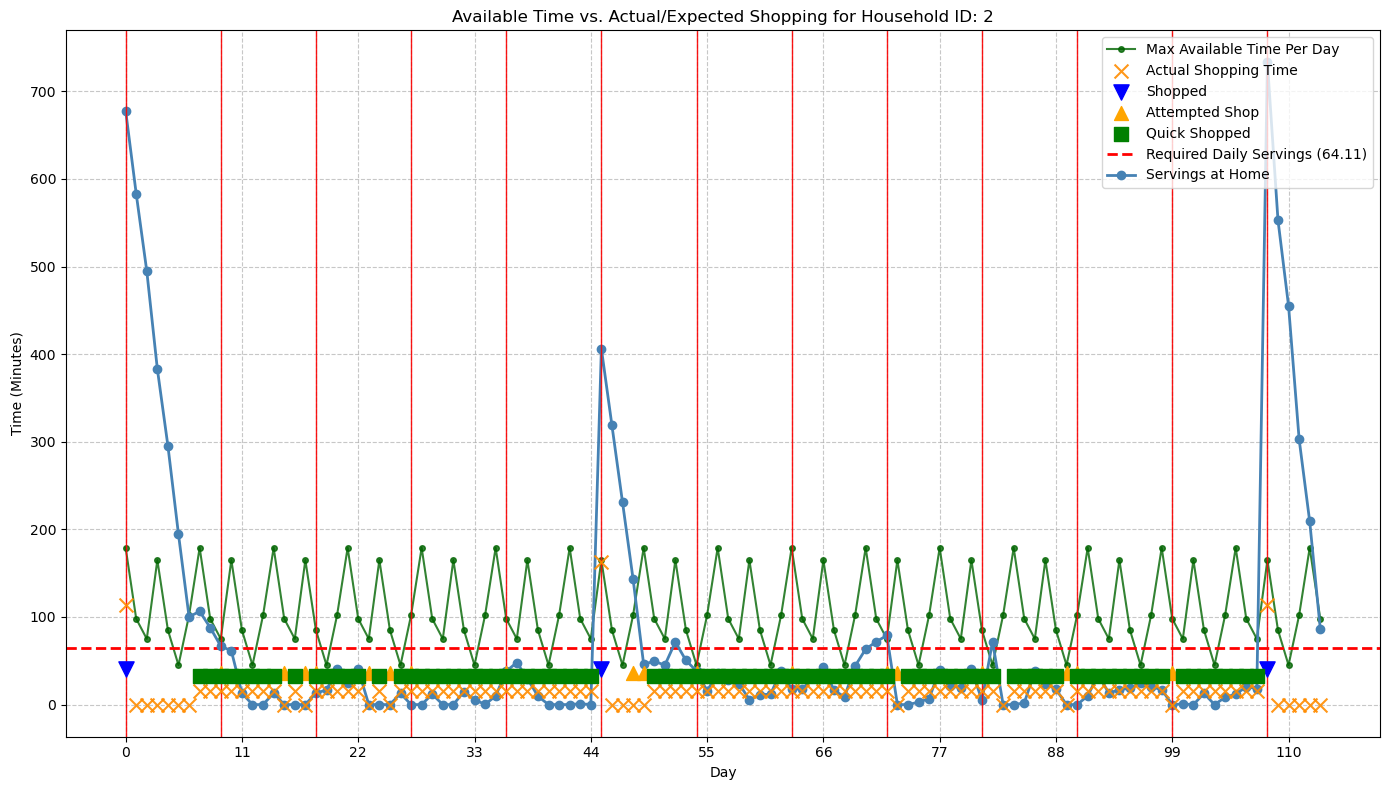

In [21]:



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd # Import Dask DataFrame
import ast # To safely evaluate string representations of lists

# --- 1. Load and process the config Dask DataFrame (df_config) ---
print("Loading and processing config data...")
config_file_path = "/blue/carpena/haasehelen/ifwaste/input/gsua_based_configuration/samples/household_ifwaste_sample_df.txt"

df_config = dd.read_csv(config_file_path, sep="\t")
df_config = df_config.reset_index()

# Rename the newly created index column to 'household'
if 'index' in df_config.columns:
    df_config = df_config.rename(columns={'index': 'household'})
elif 'level_0' in df_config.columns:
    df_config = df_config.rename(columns={'level_0': 'household'})
else:
    print("Warning: Could not find 'index' or 'level_0' column after reset_index. Assuming 'household' column already exists or was created differently.")

# Clean other column names by removing 'Household:' prefix
df_config.columns = [
    col.replace('Household:', '') if isinstance(col, str) and 'Household:' in col else col
    for col in df_config.columns
]

# Ensure 'household' column in df_config is numeric for merging/filtering
df_config['household'] = df_config['household'].astype(int)


# Generate sample household IDs that will likely overlap with config households
sample_household_ids = np.arange(num_households_log) # Using sequential IDs for simplicity

log_hh_daily = data_dict["log_hh_daily"]
log_hh_daily['household'] = log_hh_daily['household'].astype(int)

common_households = pd.Series(list(set(log_hh_daily['household'].unique().compute()) & \
                                   set(df_config['household'].unique().compute())))

if not common_households.empty:
    household_to_plot_id = common_households.iloc[SAMPLE_ID] # Pick the first common household ID
else:
    print("No common households found between log_hh_daily and df_config. Cannot plot.")
    household_to_plot_id = None # Set to None to skip plotting

if household_to_plot_id is not None:
    # Filter log_hh_daily for the selected household and compute to Pandas
    selected_household_log_data = log_hh_daily[log_hh_daily['household'] == household_to_plot_id].compute()

    # Retrieve hh_max_avail_time_per_day and hh_shopping_frequency for the selected household from df_config
    config_for_selected_hh = df_config[df_config['household'] == household_to_plot_id][
        ['hh_max_avail_time_per_day', 'hh_shopping_frequency']
    ].compute()

    if not config_for_selected_hh.empty:
        # Parse hh_max_avail_time_per_day
        print(config_for_selected_hh['hh_max_avail_time_per_day'])
        max_avail_time_list_str = config_for_selected_hh['hh_max_avail_time_per_day'].iloc[0]
        try:
            hh_max_avail_time_list = ast.literal_eval(max_avail_time_list_str)
            if not isinstance(hh_max_avail_time_list, list):
                raise ValueError("Evaluated value is not a list.")
        except (ValueError, SyntaxError) as e:
            print(f"Error parsing hh_max_avail_time_per_day for household {household_to_plot_id}: {e}")
            print("Defaulting to a dummy list for plotting.")
            hh_max_avail_time_list = [0] * 7 # Fallback dummy list for plotting

        # Get hh_shopping_frequency
        hh_shopping_frequency = config_for_selected_hh['hh_shopping_frequency'].iloc[0]
        print(f"Household {household_to_plot_id} shopping frequency: {hh_shopping_frequency} days.")
        print(selected_household_log_data.columns)
        # Calculate the hh_max_avail_time_per_day for each day based on the 7-day cycle
        selected_household_log_data = selected_household_log_data.sort_values(by='day')
        selected_household_log_data['expected_available_time'] = selected_household_log_data['day'].apply(
            lambda d: hh_max_avail_time_list[d % 7]
        )

        # Determine days when the household should shop
        # Assuming day 0 is a potential shopping day, then every hh_shopping_frequency days thereafter
        should_shop_days = [
            day for day in range(num_days)
            if day % hh_shopping_frequency == 0
        ]
       
    
        ## TODO add the values from the new run!!! 
        # Identify days based on event type
        days_shopped = selected_household_log_data[selected_household_log_data['shopped'] == 1]['day'].tolist()
        days_attempted_shop = selected_household_log_data[selected_household_log_data['attempted_shop'] == 1]['day'].tolist()
        days_quick_shopped = selected_household_log_data[selected_household_log_data['quick_shopped'] == 1]['day'].tolist()
        y_actual_shop_marker = selected_household_log_data['expected_available_time'].min() * 0.9 if not selected_household_log_data.empty else 0
        if y_actual_shop_marker == 0: # If all times are 0, use a small offset
            y_actual_shop_marker = -5
        # Plotting
        plt.figure(figsize=(14, 8)) # Slightly larger figure for clarity
        plt.plot(selected_household_log_data['day'], selected_household_log_data['expected_available_time'],
                 label='Max Available Time Per Day', color='darkgreen', linestyle='-', marker='o', markersize=4, alpha=0.8)
        plt.scatter(selected_household_log_data['day'], selected_household_log_data['shopping_time'],
                    label='Actual Shopping Time', color='darkorange', marker='x', s=100, alpha=0.9, zorder=5)

        plt.scatter(days_shopped, [y_actual_shop_marker] * len(days_shopped),
                    marker='v', s=120, color='blue', label='Shopped', zorder=6)

        plt.scatter(days_attempted_shop, [y_actual_shop_marker - 4] * len(days_attempted_shop),
                    marker='^', s=100, color='orange', label='Attempted Shop', zorder=6)

        plt.scatter(days_quick_shopped, [y_actual_shop_marker - 8] * len(days_quick_shopped),
                    marker='s', s=100, color='green', label='Quick Shopped', zorder=6)
        
        plt.axhline(y=required_serving, color='red', linestyle='--', linewidth=2,
            label=f'Required Daily Servings ({required_serving})')

        plt.plot(food_data['day'], food_data['servings_at_home'],
         color='steelblue', marker='o', linestyle='-',
         linewidth=2, markersize=6, label='Servings at Home')

        
        # Add vertical lines for days the household should shop
        for shop_day in should_shop_days:
            plt.axvline(x=shop_day, color='gray', linestyle='--', linewidth=0.8, alpha=0.7, label='_nolegend_') # _nolegend_ to avoid repeating label
            plt.axvline(x=shop_day, color='red', linewidth=1, alpha=0.9)

        # Add markers for days the household actually shopped at the bottom of the plot
        # Using a fixed y-value for clarity
        

       
        plt.title(f'Available Time vs. Actual/Expected Shopping for Household ID: {int(household_to_plot_id)}')
        plt.xlabel('Day')
        plt.ylabel('Time (Minutes)')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(np.arange(0, num_days, max(1, num_days // 10))) # Dynamic x-ticks
        plt.legend()
        plt.tight_layout()
        plt.show()

        


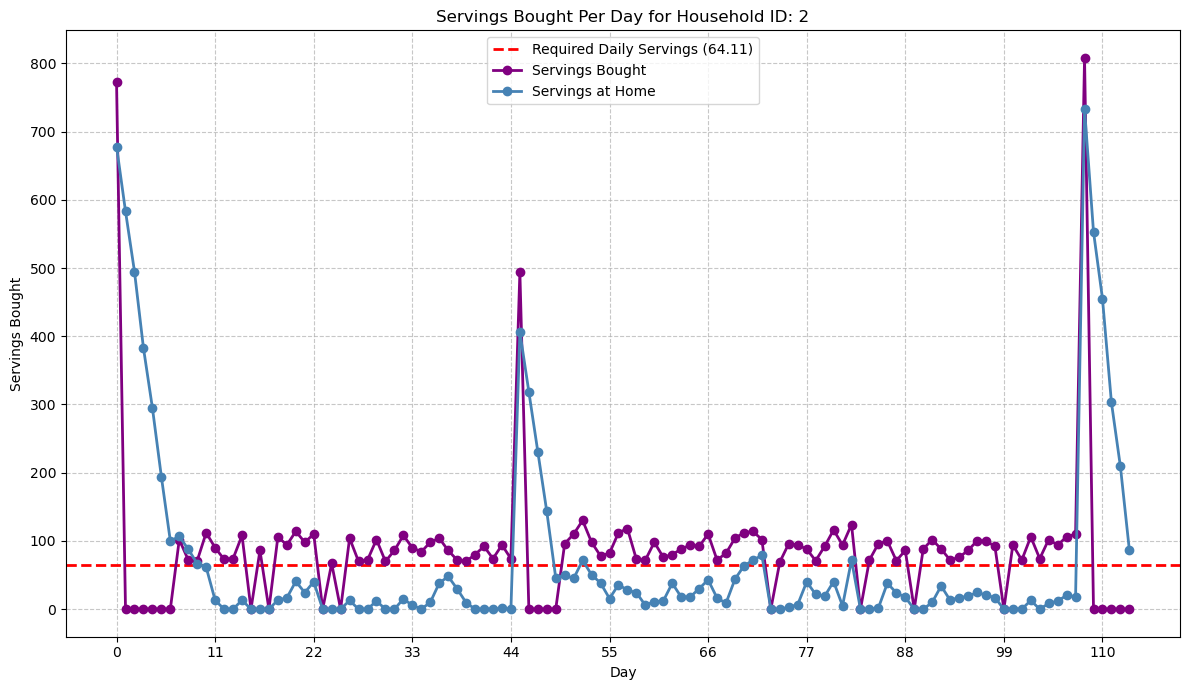

In [22]:
### do the agents buy food on quickshop days?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Plotting servings bought per day

plt.axhline(y=required_serving, color='red', linestyle='--', linewidth=2,
            label=f'Required Daily Servings ({required_serving})')

plt.plot(food_data['day'], food_data['servings_bought'],
         color='purple', marker='o', linestyle='-',
         linewidth=2, markersize=6, label='Servings Bought')

plt.plot(food_data['day'], food_data['servings_at_home'],
         color='steelblue', marker='o', linestyle='-',
         linewidth=2, markersize=6, label='Servings at Home')

# Add labels and title
plt.title(f'Servings Bought Per Day for Household ID: {int(SAMPLE_ID)}')
plt.xlabel('Day')
plt.ylabel('Servings Bought')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, food_data['day'].max() + 1, max(1, food_data['day'].max() // 10))) # Dynamic x-ticks
plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig('servings_bought_per_day.png', dpi=300)
plt.show()



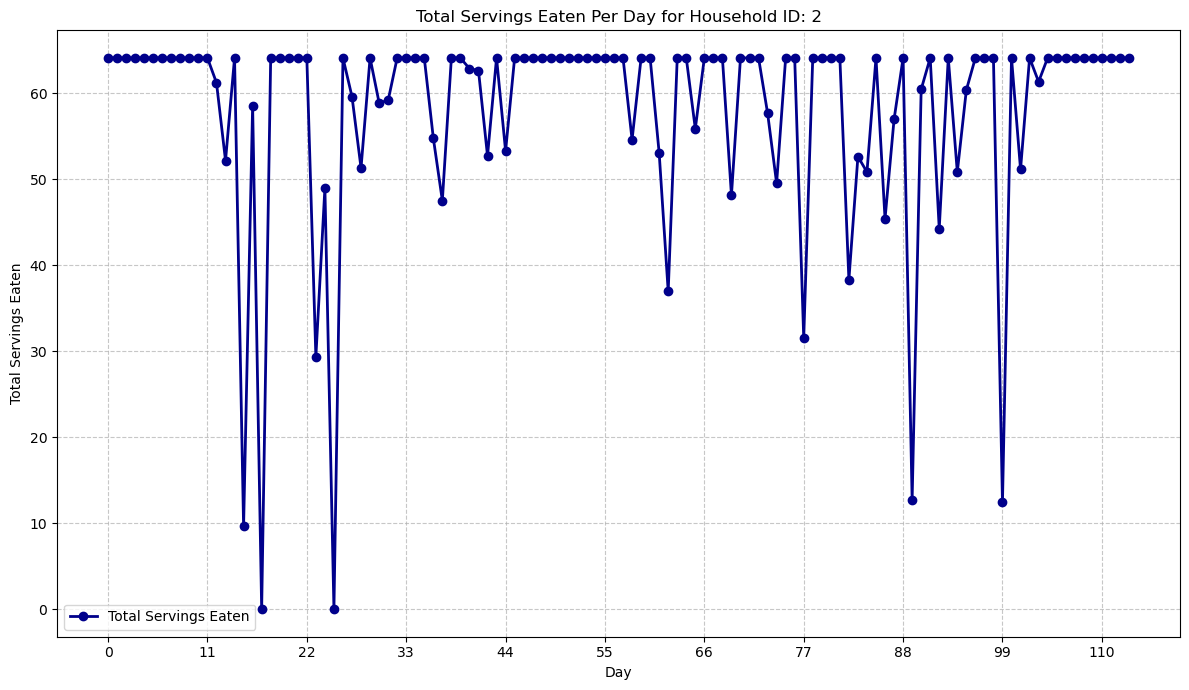

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Calculate total servings eaten per day ---
# Summing the 'servings' column for each day
daily_eaten_servings = eaten_household.groupby('day')['servings'].sum().reset_index()
daily_eaten_servings.rename(columns={'servings': 'total_servings_eaten'}, inplace=True)

# Ensure all days up to the max day are present, filling missing days with 0 servings
max_day = daily_eaten_servings['day'].max()
all_days = pd.DataFrame({'day': range(int(max_day) + 1)})
daily_eaten_servings = pd.merge(all_days, daily_eaten_servings, on='day', how='left').fillna(0)

plt.figure(figsize=(12, 7))

# Plotting total servings eaten per day
plt.plot(daily_eaten_servings['day'], daily_eaten_servings['total_servings_eaten'],
         color='darkblue', # Changed color for distinction
         marker='o',
         linestyle='-',
         linewidth=2,
         markersize=6,
         label='Total Servings Eaten')

#plt.plot(food_data['day'], food_data['servings_at_home'],
#         color='steelblue', marker='o', linestyle='-',
#         linewidth=2, markersize=6, label='Servings at Home')

#plt.plot(food_data['day'], food_data['servings_bought'],
#         color='purple', marker='o', linestyle='-',
#         linewidth=2, markersize=6, label='Servings Bought')

 # Add vertical lines for days the household should shop
#for shop_day in should_shop_days:
#    plt.axvline(x=shop_day, color='red', linewidth=1, alpha=0.9)

# Add labels and title
plt.title(f'Total Servings Eaten Per Day for Household ID: {int(SAMPLE_ID)}')
plt.xlabel('Day')
plt.ylabel('Total Servings Eaten')
plt.grid(True, linestyle='--', alpha=0.7)
# Set x-ticks to show all days if the number of days is small, or a reasonable interval
plt.xticks(np.arange(0, daily_eaten_servings['day'].max() + 1, max(1, (daily_eaten_servings['day'].max() + 1) // 10)))
plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig('total_servings_eaten_per_day.png', dpi=300)
plt.show()


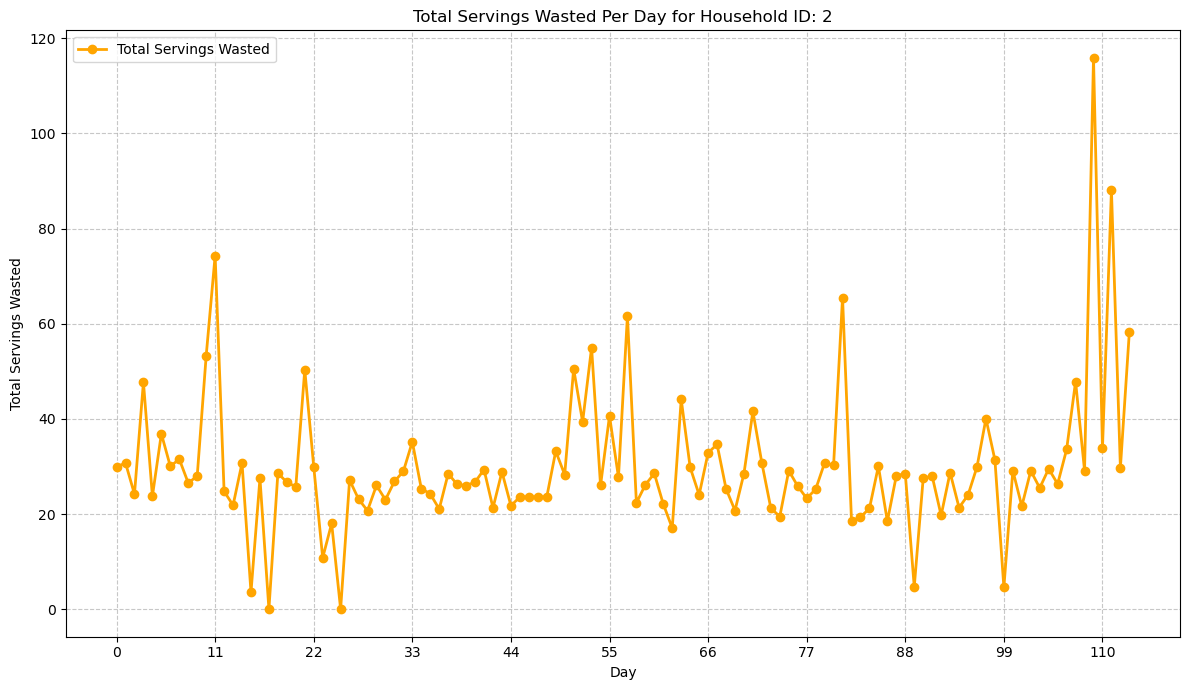

In [24]:
### WASTE IN THE INITIAL CATEGORY


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Calculate total servings eaten per day ---
# Summing the 'servings' column for each day
wasted_household = data_dict["log_wasted"][data_dict["log_wasted"]["household"] == SAMPLE_ID].compute()

daily_wasted_servings = wasted_household.groupby('day')['servings'].sum().reset_index()
daily_wasted_servings.rename(columns={'servings': 'total_servings_eaten'}, inplace=True)

# Ensure all days up to the max day are present, filling missing days with 0 servings
max_day = daily_wasted_servings['day'].max()
all_days = pd.DataFrame({'day': range(int(max_day) + 1)})
daily_wasted_servings = pd.merge(all_days, daily_wasted_servings, on='day', how='left').fillna(0)

plt.figure(figsize=(12, 7))

# Plotting total servings eaten per day
plt.plot(daily_wasted_servings['day'], daily_wasted_servings['total_servings_eaten'],
         color='orange', # Changed color for distinction
         marker='o',
         linestyle='-',
         linewidth=2,
         markersize=6,
         label='Total Servings Wasted')

#plt.plot(food_data['day'], food_data['servings_at_home'],
#         color='steelblue', marker='o', linestyle='-',
#         linewidth=2, markersize=6, label='Servings at Home')

#plt.plot(food_data['day'], food_data['servings_bought'],
#         color='purple', marker='o', linestyle='-',
#         linewidth=2, markersize=6, label='Servings Bought')

 # Add vertical lines for days the household should shop
#for shop_day in should_shop_days:
#    plt.axvline(x=shop_day, color='red', linewidth=1, alpha=0.9)

# Add labels and title
plt.title(f'Total Servings Wasted Per Day for Household ID: {int(SAMPLE_ID)}')
plt.xlabel('Day')
plt.ylabel('Total Servings Wasted')
plt.grid(True, linestyle='--', alpha=0.7)
# Set x-ticks to show all days if the number of days is small, or a reasonable interval
plt.xticks(np.arange(0, daily_wasted_servings['day'].max() + 1, max(1, (daily_wasted_servings['day'].max() + 1) // 10)))
plt.legend()
plt.tight_layout()

# Save the figure
plt.show()


In [25]:
# Define the columns for analysis
fg = ['FGMEAT', 'FGDAIRY', 'FGVEGETABLE', 'FGDRYFOOD',
      'FGSNACKS', 'FGBAKED', 'FGSTOREPREPARED']
reasons = ['Inedible Parts', 'Plate Waste', 'Spoiled Food']
status = ['Prepared', 'Unprepared', 'Preprepared']

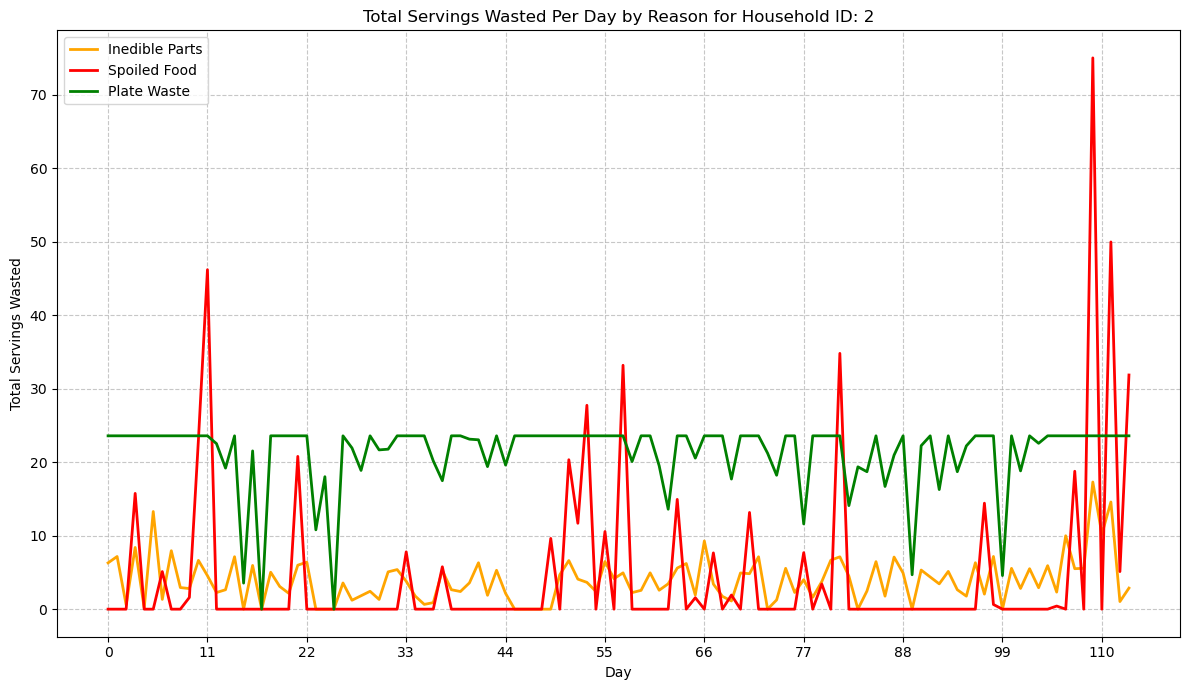

In [26]:
### WASTE BY REASON CATEGORY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group by day and reason, then sum servings
wasted_household = data_dict["log_wasted"][data_dict["log_wasted"]["household"] == SAMPLE_ID].compute()

daily_wasted_by_reason = wasted_household.groupby(['day', 'reason'])['servings'].sum().unstack(fill_value=0)

# Ensure all days up to the max day are present and fill missing values with 0
max_day = daily_wasted_by_reason.index.max() if not daily_wasted_by_reason.empty else 0
all_days = pd.DataFrame({'day': range(int(max_day) + 1)})
daily_wasted_by_reason = all_days.set_index('day').join(daily_wasted_by_reason, how='left').fillna(0)

# Ensure all three reasons exist as columns, even if no waste for a reason
for reason in reasons:
    if reason not in daily_wasted_by_reason.columns:
        daily_wasted_by_reason[reason] = 0.0

# --- Matplotlib Plotting ---

plt.figure(figsize=(12, 7))

# Plotting total servings wasted per day for each reason
plt.plot(daily_wasted_by_reason.index, daily_wasted_by_reason["Inedible Parts"],
         color='orange',
         linewidth=2,
         markersize=6,
         label='Inedible Parts')

plt.plot(daily_wasted_by_reason.index, daily_wasted_by_reason["Spoiled Food"],
         color='red',
         linewidth=2,
         markersize=6,
         label='Spoiled Food')

plt.plot(daily_wasted_by_reason.index, daily_wasted_by_reason["Plate Waste"],
         color='green',
         linewidth=2,
         markersize=6,
         label='Plate Waste')

# Add labels and title
plt.title(f'Total Servings Wasted Per Day by Reason for Household ID: {int(SAMPLE_ID)}')
plt.xlabel('Day')
plt.ylabel('Total Servings Wasted')
plt.grid(True, linestyle='--', alpha=0.7)
# Set x-ticks to show all days if the number of days is small, or a reasonable interval
plt.xticks(np.arange(0, daily_wasted_by_reason.index.max() + 1, max(1, (daily_wasted_by_reason.index.max() + 1) // 10)))
plt.legend()
plt.tight_layout()

# Save the figure (optional, uncomment to save)
# plt.savefig('total_servings_wasted_by_reason_per_day.png', dpi=300)
plt.show()


In [27]:
import pandas as pd
import numpy as np
# Ensure all three reasons exist as columns, even if no waste for a reason
for reason in reasons:
    if reason not in daily_wasted_by_reason.columns:
        daily_wasted_by_reason[reason] = 0.0

# Calculate sum of waste for the first 9 days (days 0 to 8)
waste_first_9_days = daily_wasted_by_reason.loc[0:8].sum().sum()

# Calculate sum of waste for the second 9 days (days 9 to 17)
waste_second_9_days = daily_wasted_by_reason.loc[9:17].sum().sum()

print(f"Total waste in the first 9 days (Day 0-8): {waste_first_9_days:.2f} servings")
print(f"Total waste in the second 9 days (Day 9-17): {waste_second_9_days:.2f} servings")

Total waste in the first 9 days (Day 0-8): 281.17 servings
Total waste in the second 9 days (Day 9-17): 263.87 servings


In [28]:
### AGGREGATED WASTE


In [29]:
agg_outputs = data_dict["aggregated_outputs"] 

In [30]:
agg_outputs.columns

Index(['household', 'FGMEAT', 'FGDAIRY', 'FGVEGETABLE', 'FGDRYFOOD',
       'FGSNACKS', 'FGBAKED', 'FGSTOREPREPARED', 'Inedible Parts',
       'Plate Waste', 'Spoiled Food', 'Prepared', 'Unprepared', 'Preprepared',
       'n_quickcook', 'n_cook', 'n_attempted_cook', 'n_leftovers', 'n_shop',
       'n_quickshop', 'n_attempted_shop', 'run'],
      dtype='object')

In [31]:
fg = ['FGMEAT', 'FGDAIRY', 'FGVEGETABLE', 'FGDRYFOOD', 'FGSNACKS', 'FGBAKED', 'FGSTOREPREPARED']
reason = ['Inedible Parts', 'Plate Waste', 'Spoiled Food']
status = ['Prepared', 'Unprepared', 'Preprepared']



--- Processed Data for Food Group Quantities (first 5 rows) ---
    FGMEAT  FGDAIRY  FGVEGETABLE  FGDRYFOOD  FGSNACKS  FGBAKED  \
0  1.34871  2.16988      4.20878    1.14172   1.67821  2.21820   
1  0.48326  0.50192      0.61930    0.79013   0.86751  0.30459   
2  2.14288  1.46064      2.30979    1.15153   1.60595  1.87607   
3  2.01346  2.34496      0.70170    0.63714   1.03725  0.99528   
4  2.02164  3.52902      0.68908    2.42611   2.64799  0.48940   

   FGSTOREPREPARED   FGMEAT  FGDAIRY  FGVEGETABLE  FGDRYFOOD  FGSNACKS  \
0          2.11854  1.34871  2.16988      4.20878    1.14172   1.67821   
1          3.26457  0.48326  0.50192      0.61930    0.79013   0.86751   
2          2.20774  2.14288  1.46064      2.30979    1.15153   1.60595   
3          3.81776  2.01346  2.34496      0.70170    0.63714   1.03725   
4          4.54828  2.02164  3.52902      0.68908    2.42611   2.64799   

   FGBAKED  FGSTOREPREPARED  
0  2.21820          2.11854  
1  0.30459          3.26457  
2  

/scratch/local/6563333/ipykernel_2145923/4051947373.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels)


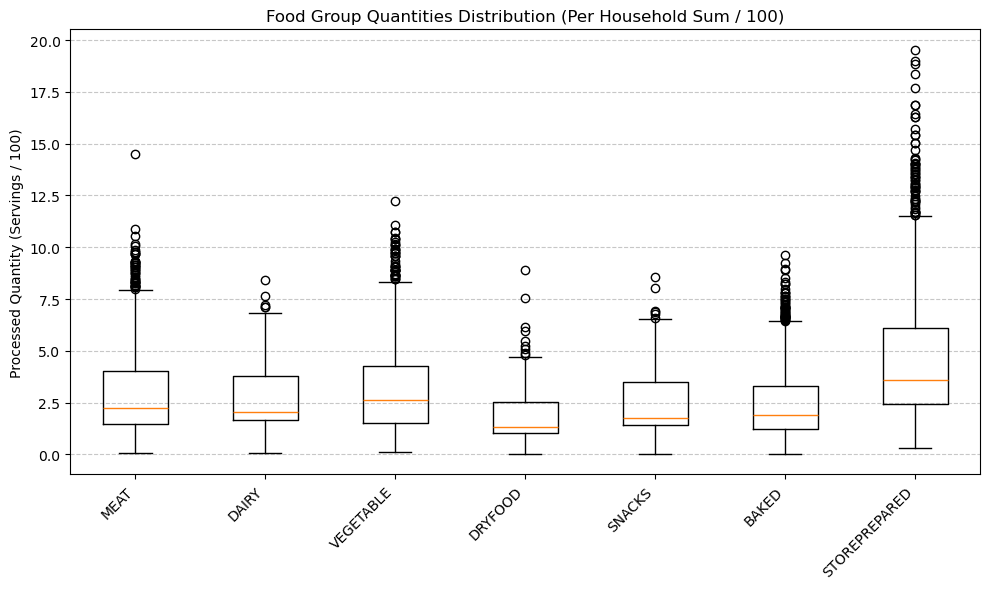


--- Processed Data for Waste Reason Quantities (first 5 rows) ---
   Inedible Parts  Plate Waste  Spoiled Food  Inedible Parts  Plate Waste  \
0        3.844581      9.18364      1.855823        3.844581      9.18364   
1        0.868701      2.06343      3.899151        0.868701      2.06343   
2        2.945359      8.43225      1.376986        2.945359      8.43225   
3        1.874932      3.18159      6.491023        1.874932      3.18159   
4        2.071114     11.62032      2.660084        2.071114     11.62032   

   Spoiled Food  
0      1.855823  
1      3.899151  
2      1.376986  
3      6.491023  
4      2.660084  
--------------------------------------------------


/scratch/local/6563333/ipykernel_2145923/4051947373.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels)


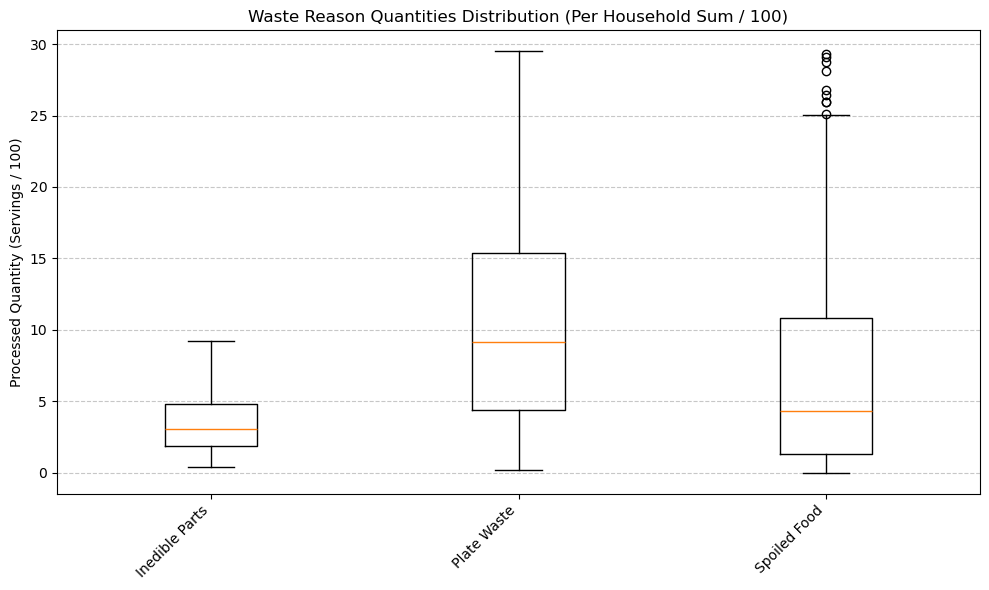


--- Processed Data for Food Status Quantities (first 5 rows) ---
   Prepared  Unprepared  Preprepared  Prepared  Unprepared  Preprepared
0   7.44242    5.323080     2.118543   7.44242    5.323080     2.118543
1   2.73813    0.828579     3.264569   2.73813    0.828579     3.264569
2   6.98390    3.562963     2.207741   6.98390    3.562963     2.207741
3   4.95518    2.774612     3.817757   4.95518    2.774612     3.817757
4   9.83933    1.963913     4.548277   9.83933    1.963913     4.548277
--------------------------------------------------


/scratch/local/6563333/ipykernel_2145923/4051947373.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels)


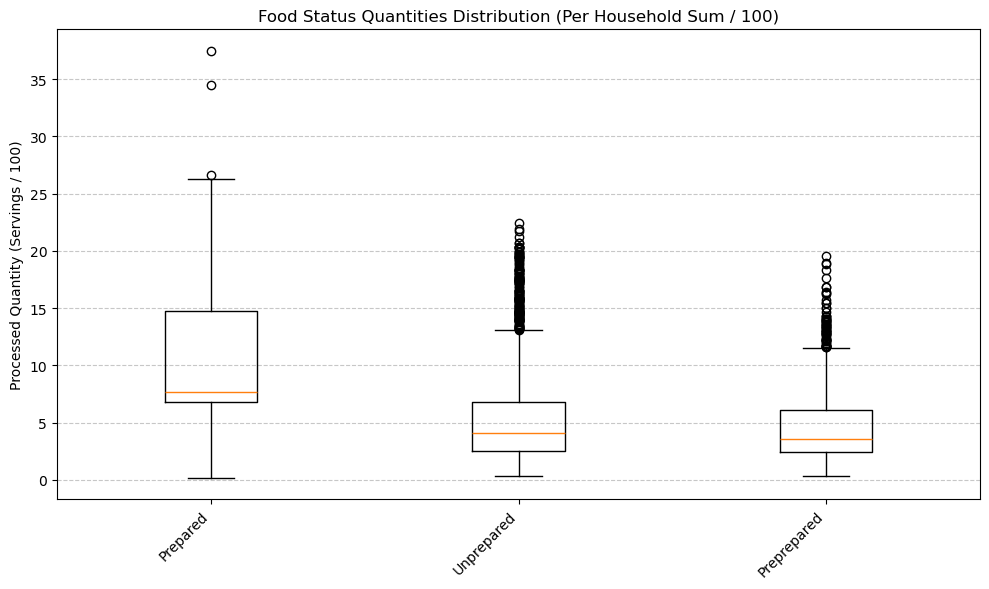

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to create a boxplot for a given list of columns
def create_boxplot(df_input, columns, title_prefix, y_label):
    """
    Generates a boxplot for specified columns in a DataFrame,
    dividing the values by 100 before plotting. Also prints
    the head of the processed DataFrame for validation.

    Args:
        df_input (pd.DataFrame): The input DataFrame containing the data.
        columns (list): A list of column names to plot.
        title_prefix (str): Prefix for the plot title.
        y_label (str): Label for the Y-axis.
    """
    # Create a copy of the relevant columns to perform division
    # This ensures the original DataFrame (df_input) is not modified.
    df_temp = df_input[columns].copy()

    # Divide all values in the selected columns by 100
    for col in columns:
        df_temp[col] = df_temp[col] / 100
    
    # --- ADDED FOR VALIDATION ---
    print(f"\n--- Processed Data for {title_prefix} (first 5 rows) ---")
    print(df_temp.head())
    print("-" * 50)
    # --- END VALIDATION ADDITION ---

    plt.figure(figsize=(10, 6))
    
    # Extract data for boxplot: each list element corresponds to a box
    # .values is used to get the underlying numpy array for plotting
    boxplot_data = [df_temp[col].values for col in columns]
    
    # Generate labels for the x-axis, replacing 'FG' prefix for Food Groups
    # This makes the labels cleaner (e.g., 'MEAT' instead of 'FGMEAT')
    labels = [col.replace('FG', '') for col in columns] if columns == fg else columns

    # Create the boxplot
    plt.boxplot(boxplot_data, labels=labels)
    
    # Set plot title and labels
    plt.title(f'{title_prefix} Distribution (Per Household Sum / 100)')
    plt.ylabel(y_label)
    
    # Rotate x-axis labels for better readability if they are long
    plt.xticks(rotation=45, ha='right')
    
    # Add a grid for easier reading of values
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent labels/titles from overlapping
    plt.tight_layout()
    plt.show()

# --- Call the function for each category ---

# IMPORTANT: Ensure 'data_dict' with 'aggregated_outputs' DataFrame is defined
# in your environment before running this code.
# The 'aggregated_outputs' DataFrame should contain the summed values per household
# for the 'fg', 'reason', and 'status' columns.

# 1. Boxplot for Food Groups (FG)
create_boxplot(data_dict["aggregated_outputs"], fg, 'Food Group Quantities', 'Processed Quantity (Servings / 100)')

# 2. Boxplot for Waste Reasons
create_boxplot(data_dict["aggregated_outputs"], reason, 'Waste Reason Quantities', 'Processed Quantity (Servings / 100)')

# 3. Boxplot for Food Status
create_boxplot(data_dict["aggregated_outputs"], status, 'Food Status Quantities', 'Processed Quantity (Servings / 100)')

# You can uncomment the lines below to save the figures
# plt.savefig("food_group_boxplot_processed.png", bbox_inches='tight', dpi=300)
# plt.savefig("waste_reason_boxplot_processed.png", bbox_inches='tight', dpi=300)
# plt.savefig("food_status_boxplot_processed.png", bbox_inches='tight', dpi=300)


In [33]:
###TODO next:do relative portions

In [34]:
##################################################################################################################

In [35]:
## COOKING
SAMPLE_ID =  2

In [36]:
agg_output_hh = data_dict["aggregated_outputs"][data_dict["aggregated_outputs"]["household"] == SAMPLE_ID]
daily = data_dict["log_hh_daily"][data_dict["log_hh_daily"]["household"] == SAMPLE_ID].compute()

In [37]:
# Retrieve hh_max_avail_time_per_day and hh_shopping_frequency for the selected household from df_config
config_for_selected_hh = df_config[df_config['household'] == SAMPLE_ID][
    ['hh_max_avail_time_per_day', 'hh_shopping_frequency']
].compute()

max_avail_time_list_str = config_for_selected_hh['hh_max_avail_time_per_day'].iloc[0]
hh_max_avail_time_list = ast.literal_eval(max_avail_time_list_str)
hh_shopping_frequency = config_for_selected_hh['hh_shopping_frequency'].iloc[0]
daily = daily.sort_values(by='day')
daily['expected_available_time'] = daily['day'].apply(
    lambda d: hh_max_avail_time_list[d % 7] 
)

daily["available_time"] = daily["expected_available_time"] - daily["shopping_time"]

In [38]:
daily.head()

,household,day,budget,servings,EEF,shopped,quick_shopped,attempted_shop,attempted_cook,cooked,ate_leftovers,quick_cook,shopping_time,cooking_time,run,shopping_attempt,expected_available_time,available_time
340,2,0,-31.056,0.0,0,1,0,0,0,1,1,0,113.394,19.0,0,1,179,65.606
1911,2,1,-31.056,0.0,0,0,0,0,0,1,1,0,0.000,19.0,0,0,98,98.000
3230,2,2,-31.056,0.0,1,0,0,0,0,0,1,1,0.000,9.5,0,0,75,75.000
4405,2,3,-31.056,0.0,0,0,0,0,0,1,1,0,0.000,19.0,0,0,165,165.000
4727,2,4,-31.056,0.0,1,0,0,0,0,0,1,1,0.000,9.5,0,0,85,85.000


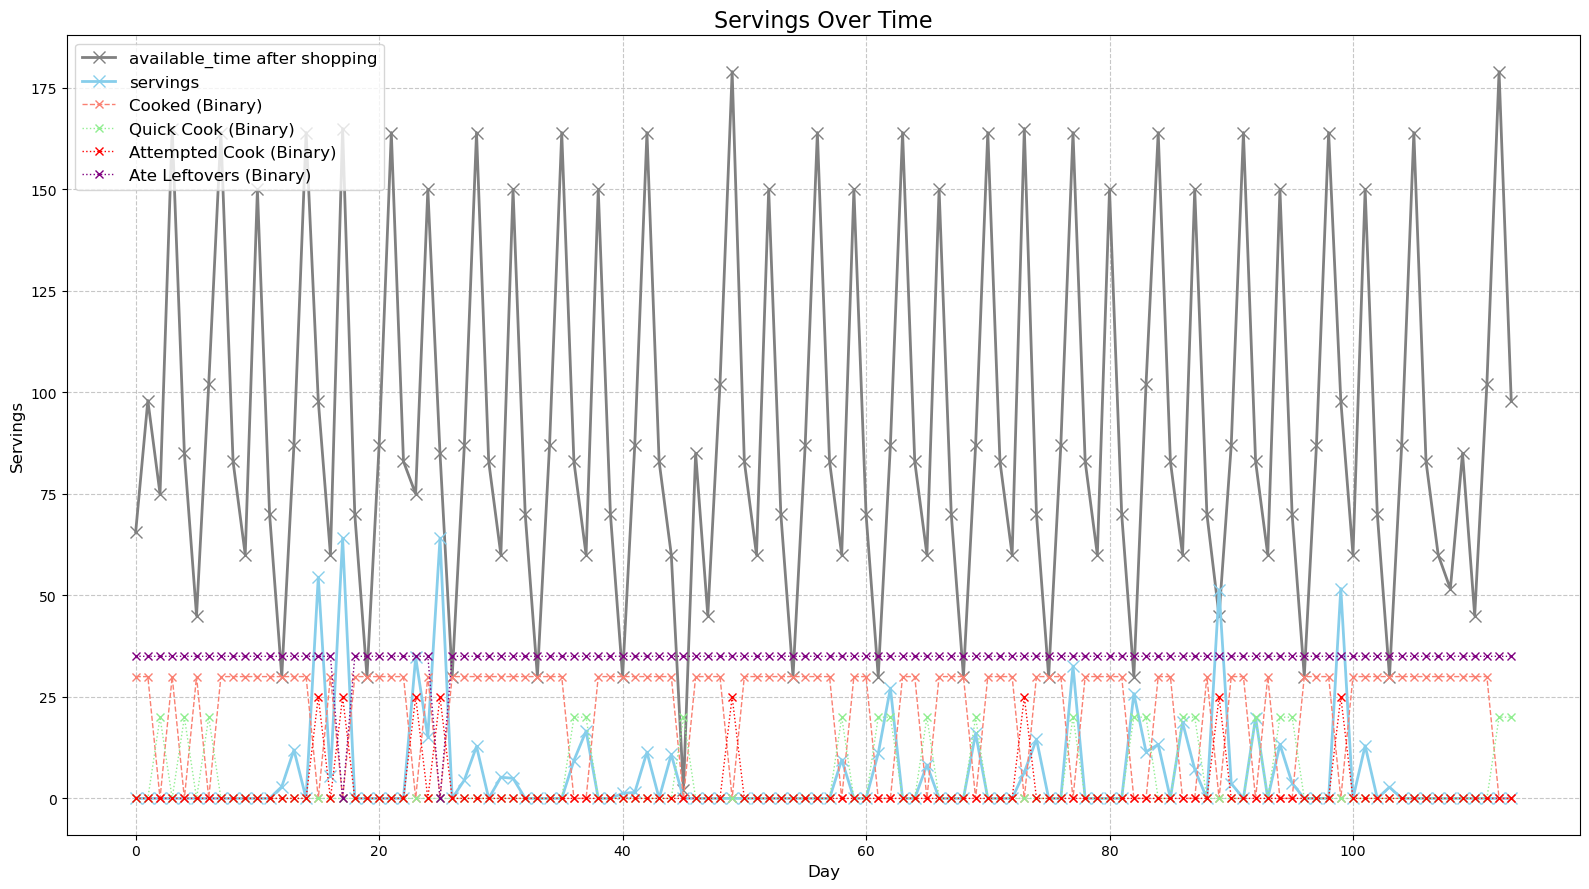

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 9))

plt.plot(daily['day'], daily['available_time'], marker='x', linestyle='-', color='grey', linewidth=2, markersize=8, label="available_time after shopping")

plt.plot(daily['day'], daily['servings'], marker='x', linestyle='-', color='skyblue', linewidth=2, markersize=8, label="servings")
plt.plot(daily['day'], daily['cooked'] * 30, marker='x', linestyle='--', color='salmon', linewidth=1, markersize=6, label='Cooked (Binary)')
plt.plot(daily['day'], daily['quick_cook'] * 20, marker='x', linestyle=':', color='lightgreen', linewidth=1, markersize=6, label='Quick Cook (Binary)')
plt.plot(daily['day'], daily['attempted_cook'] * 25, marker='x', linestyle=':', color='red', linewidth=1, markersize=6, label='Attempted Cook (Binary)')
plt.plot(daily['day'], daily['ate_leftovers'] * 35, marker='x', linestyle=':', color='purple', linewidth=1, markersize=6, label='Ate Leftovers (Binary)')


plt.title('Servings Over Time', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Servings', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12, loc='upper left')

plt.tight_layout()
plt.show()
